In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive_output, VBox, HBox, Label, Box, Output
from ipywidgets import Button, Checkbox, IntSlider, FloatRangeSlider, Checkbox, FloatSlider, Layout, interact_manual
from IPython.display import display
%matplotlib inline

In [ ]:
bt1 = Button(description="Save image")
output = Output()

display(bt1, output)

def button_clicked(b):
    with output:
        print("Button clicked.", output, b)

bt1.on_click(button_clicked)

In [ ]:
Xn = np.arange(0, 1, 0.01)
#a = np.arange(0, 4, 0.01)

#@interact(a=(0, 4, 0.1))
def f(a):
    Xn1 = a * Xn * (1 - Xn)
    plt.figure(figsize=(4,4))
    plt.axis([0, 1, 0, 1], 'equal')
    plt.plot(Xn, Xn1)

a = FloatSlider(value=0.5, min=0.0, max=4.0, step=0.01, layout=Layout(width='80%'))
#ui = HBox([a])
W = interactive_output(f, {'a': a})
display(a, W)

In [ ]:
T = 50
@interact(a=(0, 4, 0.1), x=(0, 1, 0.001))
def f(a=2.8, x=0.3):
    X = [0]
    for t in range(1,T):
        x = a * x * (1 - x)
        X.append(x)
    plt.figure(figsize=(14,4))
    plt.axis([0, T, 0, 1], 'equal')
    plt.plot(list(range(T)), X)

In [ ]:
@interact(A0=FloatRangeSlider(value=[2.8, 4.0], min=0.1, max=4, step=0.01), 
          X0=(0.5, 1, 0.01), N=(1000, 50000, 1000), 
          dots=Checkbox(value=True, description='dots', disabled=False),
          lines=Checkbox(value=False, description='lines', disabled=False))
def f(A0, X0, N, dots, lines):
    A = np.linspace(A0[0], A0[1], N)
    X = []
    x = X0
    for a in A:
        x = a * x * (1 - x)
        X.append(x)

    plt.figure(figsize=(12,8))
    if lines:
        plt.plot(A, X, linewidth=0.1, color='red', alpha=0.9)
    if dots:
        plt.scatter(A, X, marker='o', s=0.1, color='black')
    plt.scatter([A[0], A[-1]], [0, 1], alpha=0)

In [ ]:
#from ipywidgets import interact, Checkbox, IntSlider, FloatSlider, FloatRangeSlider, Layout

def f(A0, X0, XR, N, dots, lines):
    A = np.linspace(A0[0], A0[1], N)
    X = [X0]
    for a in A:
        #x = a * x * (1 - x)
        x_next = a * X[-1] * (1 - X[-1])
        X.append(x_next)    
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.set_ylim((XR[0], XR[1]))
    X = X[:-1]
    if lines:
        ax.plot(A, X, linewidth=0.1, color='red', alpha=0.9)
    if dots:
        ax.scatter(A, X, marker='o', s=0.1, color='black')
    ax.scatter([A[0], A[-1]], [X[0], X[-1]], alpha=0)
    plt.show()

interact(f, 
        A0=FloatRangeSlider(value=[2.8, 4.0], min=0.1, max=4, step=0.01, layout=Layout(width='80%')),
        XR=FloatRangeSlider(value=[0, 1], min=0.0, max=1.0, step=0.01, layout=Layout(width='80%')),
        X0=FloatSlider(value=0.7, min=0.5, max=1.0, step=0.01, layout=Layout(width='80%')),
        N=IntSlider(value=20000, min=1000, max=100000*5, step=1000, layout=Layout(width='80%')),
        dots=Checkbox(value=True, description='dots', disabled=False),
        lines=Checkbox(value=False, description='lines', disabled=False))

In [ ]:
# old
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive_output, VBox, HBox, Label
from ipywidgets import Checkbox, IntSlider, FloatSlider, FloatRangeSlider, Layout
from IPython.display import display
import datetime
%matplotlib inline

def f(AR, X0, XR, N, DOTS, LINE):
    A = np.linspace(AR[0], AR[1], N)
    X = [X0]
    for a in A:
        #x = a * x * (1 - x)
        x_next = a * X[-1] * (1 - X[-1])
        X.append(x_next)    
    fig = plt.figure(figsize=(18,12))
    ax = fig.add_subplot(111)
    ax.set_ylim((XR[0], XR[1]))
    X = X[:-1]
    if LINE:
        ax.plot(A, X, linewidth=0.1, color='red', alpha=0.9)
    if DOTS:
        ax.scatter(A, X, marker='o', s=0.05, color='black')
    ax.scatter([A[0], A[-1]], [0, 1], alpha=0) # dummy plot for empty plots
    plt.show()

AR = FloatRangeSlider(value=[2.8, 4.0], min=0.0, max=4, step=0.01, layout=Layout(width='60%'))
XR = FloatRangeSlider(value=[0, 1], min=0.0, max=1.0, step=0.01, layout=Layout(width='60%'))
X0 = FloatSlider(value=0.7, min=0.0, max=1.0, step=0.01, layout=Layout(width='60%'))
N = IntSlider(value=20000, min=100, max=500000, step=100, layout=Layout(width='60%'))
DOTS = Checkbox(value=True, description='DOTS', disabled=False)
LINE = Checkbox(value=False, description='LINE', disabled=False)

S1 = HBox([Label('A RANGE:'), AR])
S2 = HBox([Label('X RANGE:'), XR])
S3 = HBox([Label('X INIT VALUE:')])
S4 = HBox([Label('N STEPS:'), N])
S5 = HBox([Label('DRAW STYLE:'), DOTS, LINE])
ui = VBox([S1, S2, S3, S4, S5])

W = interactive_output(f, {'AR':AR, 'XR':XR, 'X0':X0, 'N':N, 'DOTS':DOTS, 'LINE':LINE})
display(ui, W)

In [ ]:
# old working
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive_output, VBox, HBox, Label, interactive
from ipywidgets import Checkbox, IntSlider, FloatSlider, FloatRangeSlider, Layout
from IPython.display import display
%matplotlib inline
    
def f(AR, XR, X0, N, DOTS, LINE):
    A = np.linspace(AR[0], AR[1], N)
    x = X0
    X = []
    for a in A:
        X.append(x)
        x = x * a * (1 - x)

    fig = plt.figure(figsize=(18,12))
    ax = fig.add_subplot(111)
    ax.set_xlim((AR[0], AR[1]))
    ax.set_ylim((XR[0], XR[1]))
    
    if LINE:
        ax.plot(A, X, linewidth=0.1, color='red', alpha=0.9)
    if DOTS:
        ax.scatter(A, X, marker='o', s=0.05, color='black')
    ax.scatter([A[0], A[-1]], [XR[0], XR[-1]], alpha=0) # dummy plot for empty plots
    return X

AR = FloatRangeSlider(value=[2.8, 4.0], min=0.0, max=4, step=0.01, layout=Layout(width='60%'))
XR = FloatRangeSlider(value=[0, 1], min=0.0, max=1.0, step=0.01, layout=Layout(width='60%'))
X0 = FloatSlider(value=0.7, min=0.0, max=1.0, step=0.01, layout=Layout(width='60%'))
N = IntSlider(value=20000, min=100, max=500000, step=100, layout=Layout(width='60%'))
DOTS = Checkbox(value=True, description='DOTS', disabled=False)
LINE = Checkbox(value=False, description='LINE', disabled=False)

S1 = HBox([Label('RANGE A:'), AR])
S2 = HBox([Label('RANGE X:'), XR])
S3 = HBox([Label('X INIT VALUE:'), X0])
S4 = HBox([Label('N STEPS:'), N])
S5 = HBox([Label('DRAW STYLE:'), DOTS, LINE])
UI = VBox([S1, S2, S3, S4, S5])

W = interactive_output(f, {'AR':AR, 'XR':XR, 'X0':X0, 'N':N, 'DOTS':DOTS, 'LINE':LINE})
display(UI, W)

In [ ]:
# OK
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive_output, VBox, HBox, Label, interactive, Button
from ipywidgets import Checkbox, IntSlider, FloatSlider, FloatRangeSlider, Layout
from IPython.display import display
import datetime
%matplotlib inline
        
def f(AR, XR, X0, N, DOTS, LINE, LW):
    A = np.linspace(AR[0], AR[1], N)
    x = X0
    X = []
    for a in A:
        X.append(x)
        x = x * a * (1 - x)
            
    fig = plt.figure(figsize=(18,12))
    ax = fig.add_subplot(111)
    ax.set_xlim((AR[0], AR[1]))
    ax.set_ylim((XR[0], XR[1]))
    plt.xlabel('A', fontsize=18)
    plt.ylabel('X', fontsize=18)
    
    if LINE:
        ax.plot(A, X, linewidth=LW, color='red', alpha=0.6)
    if DOTS:
        ax.scatter(A, X, marker='o', s=0.05, color='black')
    ax.scatter([A[0], A[-1]], [XR[0], XR[-1]], alpha=0) # dummy plot for empty plots


AR = FloatRangeSlider(value=[2.8, 4.0], min=0.0, max=4, step=0.01, layout=Layout(width='60%'))
XR = FloatRangeSlider(value=[0, 1], min=0.0, max=1.0, step=0.01, layout=Layout(width='60%'))
X0 = FloatSlider(value=0.8, min=0.0, max=1.0, step=0.01, layout=Layout(width='60%'))
N = IntSlider(value=1000, min=100, max=500000, step=100, layout=Layout(width='60%'))
DOTS = Checkbox(value=True, description='DOTS', disabled=False, layout=Layout(width='15%'))
LINE = Checkbox(value=False, description='LINE', disabled=False, layout=Layout(width='20%'))
LW = FloatSlider(value=0.2, min=0.01, max=1.0, step=0.01, layout=Layout(width='30%'))
BT = Button(value=False, description="Save image")

S1 = HBox([Label('RANGE A:'), AR])
S2 = HBox([Label('RANGE X:'), XR])
S3 = HBox([Label('X INIT VALUE:'), X0])
S4 = HBox([Label('N STEPS:'), N])
S5 = HBox([Label('DRAW STYLE:'), DOTS, LINE, Label('LINE WIDTH:'), LW, BT])
UI = VBox([S1, S2, S3, S4, S5])

W = interactive_output(f, {'AR':AR, 'XR':XR, 'X0':X0, 'N':N, 'DOTS':DOTS, 'LINE':LINE, 'LW': LW})
display(UI, W)

def button_pressed(b):
    f(AR.value, XR.value, X0.value, N.value, DOTS.value, LINE.value, LW.value)
    d = str(datetime.datetime.now()).split('.')[0]
    plt.savefig('logistic' + d + '.png')
    plt.close()
    print('Image saved at ' + d)
    
BT.on_click(button_pressed)

In [1]:
# -100
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive_output, VBox, HBox, Label, interactive, Button
from ipywidgets import Checkbox, IntSlider, FloatSlider, FloatRangeSlider, Layout
from IPython.display import display
import datetime
%matplotlib inline
        
def f(AR, XR, X0, N, DOTS, LINE, LW):
    A = np.linspace(AR[0], AR[1], N)
    x = X0
    X = []
    AA = []
    for a in A:
        for i in range(400):
            x = x * a * (1 - x)
            if i >= 100:
                X.append(x)
                AA.append(a)
    #print(len(AA), len(X))
            
    fig = plt.figure(figsize=(18,12))
    ax = fig.add_subplot(111)
    ax.set_xlim((AR[0], AR[1]))
    ax.set_ylim((XR[0], XR[1]))
    plt.xlabel('A', fontsize=18)
    plt.ylabel('X', fontsize=18)
    
    if LINE:
        ax.plot(AA, X, linewidth=LW, color='red', alpha=0.6)
    if DOTS:
        ax.scatter(AA, X, marker='o', s=0.05, color='black')
    ax.scatter([A[0], A[-1]], [XR[0], XR[-1]], alpha=0) # dummy plot for empty plots


AR = FloatRangeSlider(value=[2.8, 4.0], min=0.0, max=4, step=0.01, layout=Layout(width='60%'))
XR = FloatRangeSlider(value=[0, 1], min=0.0, max=1.0, step=0.01, layout=Layout(width='60%'))
X0 = FloatSlider(value=0.8, min=0.0, max=1.0, step=0.01, layout=Layout(width='60%'))
N = IntSlider(value=1000, min=100, max=500000, step=100, layout=Layout(width='60%'))
DOTS = Checkbox(value=True, description='DOTS', disabled=False, layout=Layout(width='15%'))
LINE = Checkbox(value=False, description='LINE', disabled=False, layout=Layout(width='20%'))
LW = FloatSlider(value=0.2, min=0.01, max=1.0, step=0.01, layout=Layout(width='30%'))
BT = Button(value=False, description="Save image")

S1 = HBox([Label('RANGE A:'), AR])
S2 = HBox([Label('RANGE X:'), XR])
S3 = HBox([Label('X INIT VALUE:'), X0])
S4 = HBox([Label('N STEPS:'), N])
S5 = HBox([Label('DRAW STYLE:'), DOTS, LINE, Label('LINE WIDTH:'), LW, BT])
UI = VBox([S1, S2, S3, S4, S5])

W = interactive_output(f, {'AR':AR, 'XR':XR, 'X0':X0, 'N':N, 'DOTS':DOTS, 'LINE':LINE, 'LW': LW})
display(UI, W)

def button_pressed(b):
    f(AR.value, XR.value, X0.value, N.value, DOTS.value, LINE.value, LW.value)
    d = str(datetime.datetime.now()).split('.')[0]
    plt.savefig('logistic' + d + '.png')
    plt.close()
    print('Image saved at ' + d)
    
BT.on_click(button_pressed)

Output()

Image saved at 2019-12-14 20:50:38


In [ ]:
# NEW
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive_output, VBox, HBox, Label, interactive, Button
from ipywidgets import Checkbox, IntSlider, FloatSlider, FloatRangeSlider, Layout
from IPython.display import display
import datetime
%matplotlib inline

plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111)

def logistic_bifurcation(A_steps, A_range, X_range, X_iter, X_last, DOTS, LINE, LW):
    A = np.arange(A_range[0], A_range[1], (A_range[1]-A_range[0])/A_steps)
    X = 0.01 * np.ones(A_steps)

    ax.set_xlim((A_range[0], A_range[1]))
    ax.set_ylim((X_range[0], X_range[1]))
    plt.xlabel('A: step size at ' + str(A_steps), fontsize=18)
    plt.ylabel('X: every ' + str(X_iter) + ' iterations', fontsize=18)


A_steps = IntSlider(value=1000, min=10, max=10000, step=10, layout=Layout(width='60%'))
A_range = FloatRangeSlider(value=[2.8, 4.0], min=0.0, max=4.0, step=0.01, layout=Layout(width='60%'))
X_range = FloatRangeSlider(value=[0.0, 1.0], min=0.0, max=1.0, step=0.01, layout=Layout(width='60%'))
X_iter  = IntSlider(value=100, min=1, max=1000, step=1, layout=Layout(width='60%'))
X_last  = IntSlider(value=X.iter.value//10, min=1, max=X.iter.value, step=1, layout=Layout(width='60%'))
DOTS = Checkbox(value=True, description='DOTS', disabled=False, layout=Layout(width='15%'))
LINE = Checkbox(value=False, description='LINE', disabled=False, layout=Layout(width='20%'))
LW = FloatSlider(value=0.2, min=0.01, max=1.0, step=0.01, layout=Layout(width='30%'))
BT = Button(value=False, description="Save image")

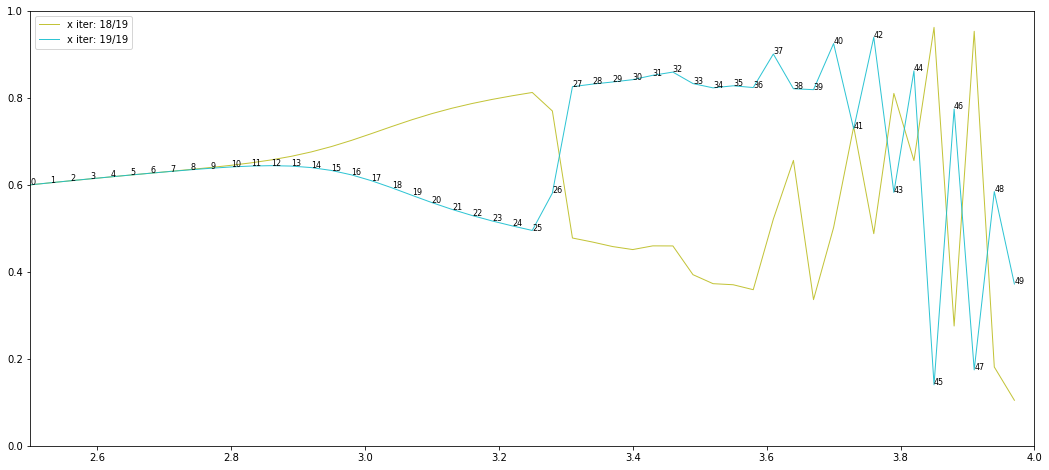

In [225]:
A_steps = 50
A_min = 2.5
A_max = 4.0
A = np.arange(A_min, A_max, (A_max-A_min)/A_steps)
X = 0.01 * np.ones(A_steps)
X_min = 0.0
X_max = 1.0
X_iter = 20
X_last = 2

fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(111)
ax.axis([A_min, A_max, X_min, X_max])

for i in range(X_iter):
    X = A * X * (1 - X)
    if i >= X_iter - X_last:
        color = 'C'+str(i%10)
        ax.plot(A, X, color=color, lw=1.0, alpha=0.9, label='x iter: ' + str(i) + '/' + str(X_iter-1))
        #ax.scatter(a, x, color=color, s=2, alpha=0.9, label='x: ' + str(i+1) + '/' + str(X_iter))
    if i == X_iter -1:
        [ax.text(x=A[j], y=X[j], s=j, fontsize=8, ) for j in range(len(A))]
        
plt.legend()

3.976000000000001

10


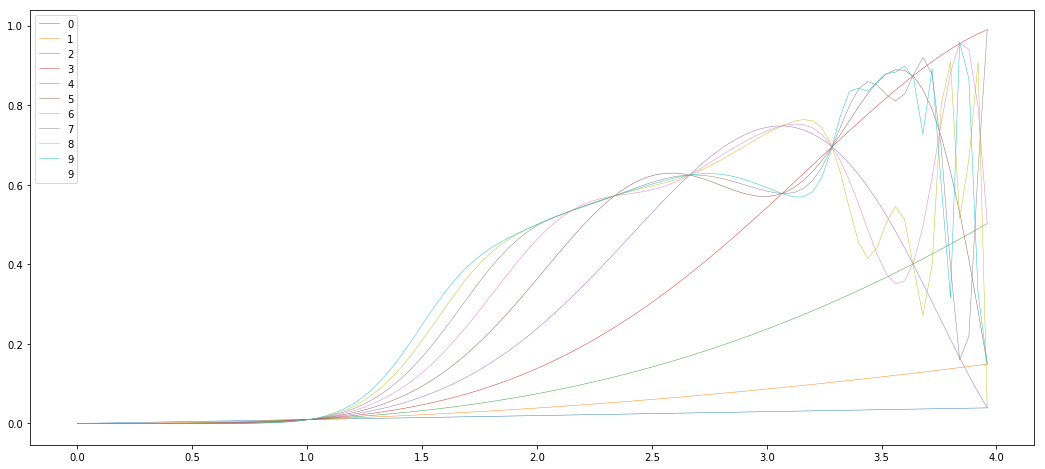

In [173]:
a_steps = 100
#a = np.linspace(0.0, 4.0, a_steps)
amin = 0
amax = 4
a = np.arange(amin, amax, (amax-amin) / a_steps)
#x = 1e-3 * np.ones(a_steps)
x = 0.01 * np.ones(a_steps)
x_iter = 10
x_last = 10

plt.figure(figsize=(18, 8))
cnt = 0
for i in range(x_iter):
    x = a * x * (1 - x)
    if i >= x_iter - x_last:
        #plt.scatter(a, x, color='k', marker='o', s=1, alpha=0.5, label=cnt)
        plt.plot(a, x, color='C'+str(i%10), lw=0.5, alpha=0.9, label=i)
        if i == x_iter-1:
            #plt.plot(a, x, color='blue', lw=2, alpha=0.9, label=cnt)
            plt.scatter(a, x, color='blue', marker='o', s=10, alpha=0.0, label=cnt)
            #[plt.text(a[j], x[j], j, fontsize=8) for j in range(len(x))]
    #cnt += 1
plt.legend()
print(cnt)

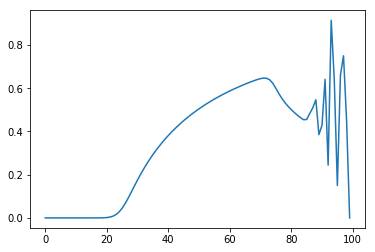

In [127]:
plt.plot(list(range(len(x))), x)

In [21]:
len(rlist)

30000

In [124]:
s = np.array([1,2,3])
s*s

array([1, 4, 9])